## Using Chicago Open Data Portal
download data Car Crahses

https://data.cityofchicago.org/Public-Safety/Crimes-2018/3i3m-jwuy

* export button, save as a csv file.

## Objective where the worst place to park in Chicago.
+ to learning basic sci kit learn preprocessing
+ learn k means clustering
+ to install run from command prompt 'pip install scikit-learn'
+ to learn standard data science work flow


In [53]:
# after you have downloaded data, load it into pytho
import pandas as pd 
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import numpy as np

#suppres science notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)
file_path = '../data/Crimes_-_2018.csv'
data = pd.read_csv(file_path)

data = data.sample(10000)
# if you are unsure where the file is
# import os
# os.listdir() # lists files in the working directory where python is.

In [54]:
# generally desribe the data
print(data.shape)
print(data.describe())
data.columns

(10000, 22)
                  ID        Beat    District        Ward  Community Area  \
count    10000.00000 10000.00000 10000.00000 10000.00000     10000.00000   
mean  11363467.20280  1145.31780    11.22340    23.58870        36.58540   
std     407486.84858   698.70808     6.97822    14.15662        21.62111   
min      23818.00000   111.00000     1.00000     1.00000         1.00000   
25%   11286701.50000   612.00000     6.00000    10.00000        22.00000   
50%   11375692.00000  1024.00000    10.00000    24.00000        32.00000   
75%   11463987.50000  1723.00000    17.00000    35.00000        54.00000   
max   11978125.00000  2535.00000    25.00000    50.00000        77.00000   

       X Coordinate  Y Coordinate        Year   Latitude  Longitude  
count    9827.00000    9827.00000 10000.00000 9827.00000 9827.00000  
mean  1165005.47563 1886809.46657  2018.00000   41.84499  -87.66998  
std     16049.86715   31329.73548     0.00000    0.08615    0.05844  
min   1099989.00000 181

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [55]:
# find what types of crime are in the dat set
set(data['Primary Type'])

{'ARSON',
 'ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CONCEALED CARRY LICENSE VIOLATION',
 'CRIM SEXUAL ASSAULT',
 'CRIMINAL DAMAGE',
 'CRIMINAL TRESPASS',
 'DECEPTIVE PRACTICE',
 'GAMBLING',
 'HOMICIDE',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'INTIMIDATION',
 'KIDNAPPING',
 'LIQUOR LAW VIOLATION',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'NON-CRIMINAL',
 'OBSCENITY',
 'OFFENSE INVOLVING CHILDREN',
 'OTHER OFFENSE',
 'PROSTITUTION',
 'PUBLIC PEACE VIOLATION',
 'ROBBERY',
 'SEX OFFENSE',
 'STALKING',
 'THEFT',
 'WEAPONS VIOLATION'}

In [56]:
# filter the data set down to only 

data_filtered = data.loc[data['Primary Type'] == 'MOTOR VEHICLE THEFT', ['Latitude','Longitude']]
print(data.shape)
print(data_filtered.shape)

(10000, 22)
(350, 2)


In [57]:

data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
28901,11226690,JB146279,02/09/2018 09:22:00 AM,053XX N WESTERN AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,NURSING HOME/RETIREMENT HOME,True,False,2011,20,40.00000,4.00000,17,1159379.00000,1935412.00000,2018,05/04/2018 03:51:04 PM,41.97850,-87.68925,"(41.978495324, -87.689251423)"
94529,11318002,JB267160,05/17/2018 11:15:00 AM,029XX S STATE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,133,1,3.00000,35.00000,08B,1176755.00000,1885570.00000,2018,05/24/2018 03:56:11 PM,41.84135,-87.62686,"(41.841350479, -87.626860911)"
14751,11206525,JB119586,01/17/2018 04:55:00 PM,025XX N CLYBOURN AVE,1330,CRIMINAL TRESPASS,TO LAND,SMALL RETAIL STORE,False,False,1931,19,32.00000,7.00000,26,1163883.00000,1917044.00000,2018,05/04/2018 03:51:04 PM,41.92800,-87.67321,"(41.927998524, -87.673208159)"
122620,11355707,JB317378,06/21/2018 10:00:00 PM,059XX N KENMORE AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,False,2433,24,48.00000,77.00000,14,1168161.00000,1939837.00000,2018,06/28/2018 03:59:19 PM,41.99045,-87.65683,"(41.990451892, -87.656826951)"
78133,11295665,JB236774,04/24/2018 09:45:00 PM,039XX N PARIS AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1631,16,36.00000,17.00000,08B,1121022.00000,1925162.00000,2018,05/04/2018 03:51:04 PM,41.95107,-87.83053,"(41.951072859, -87.830534365)"


In [58]:
data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [59]:
# Pr Process data for k means clustering
# remove or fill Null Values, in this case, and typically for Clustering, drop Null X ,y coorindates
# inplace = True means the data_filtered data frame it's self is updated
data_filtered.dropna(inplace=True)

#### Cluster Model Pipelineing
Cluster models need columns to be on the same scale,  Since lat is on -90-90 and long is on 0-180, then the data is rescaled


The standard scaler and kmeans model are pipelined together, and then a Column transformer is used to ensure the correct lat and lon cols are being predicted with

In [60]:

# create a list of lat lon columns
lat_lon_cols = ['Latitude', 'Longitude']

# remote columns where lat and lon are None
data = data.dropna(subset=lat_lon_cols)

# scale the data
scaler = StandardScaler()
data_scaled  = scaler.fit_transform(data[lat_lon_cols])

# fit the kmeans model on the scaled data 
model = KMeans(n_clusters=5, random_state=10)
model = model.fit(data_scaled )

# create clusterin pipeline linking the scaler to the model
steps = [('scale', scaler), ('model', model)]
cluster_pipe = Pipeline(steps)

# ad column selection to pipeline 
pipe = ColumnTransformer(transformers=[('cluster_pipe', cluster_pipe, lat_lon_cols)]).fit(data)


##### Cluster Model Output
THe output of the cluster model is essential a distance to each cluster..
To get the cluster that a row was assigned to, the np.argmin function finds the cluster that is the closest.

In [61]:
# to build the cluster model with k means, you need to import it from sklearn 


cluster_dist = pipe.transform(data)
cluster_labels = np.argmin(cluster_dist, axis=1)

cluster_labels[0:10]

array([4, 1, 4, 4, 3, 3, 3, 4, 3, 4])

#### Basic Frequence Counts of clusters
The following uses collections to count how many times each cluster appears


In [62]:
# create counts of labels 
## Create Cluster Labels based on frequency


#
counts = pd.DataFrame(pd.Series(Counter(cluster_labels)))
counts.columns = ['counts']
counts

,counts
4,1366
1,1940
3,2571
2,2188
0,1762


##### Extracting the Centers
Getting the cluster centers, and totals of how many times they occure can be very informative.
Here, the scaler inverse transform is used to get the centers back on a lat lon scale.

In [63]:
### Get the coorindates of the clusters
# get the model's centers 
centers = model.cluster_centers_

# rescale the centers
centers_rescaled = scaler.inverse_transform(centers)

# create a data frame of results
results = pd.DataFrame(centers_rescaled, columns =  ['Latitude','Longitude'], index=np.arange(model.n_clusters))

# merge the counts back to the results,
results = results.merge(counts, how='inner', left_index=True, right_index=True)
results

,Latitude,Longitude,counts
0,41.76872,-87.67674,1762
1,41.87719,-87.63951,1940
2,41.74326,-87.60098,2188
3,41.89874,-87.74326,2571
4,41.95959,-87.67726,1366


In [64]:
## Create Cluster Labels based on frequency
from collections import Counter
counts = Counter(cluster_labels)



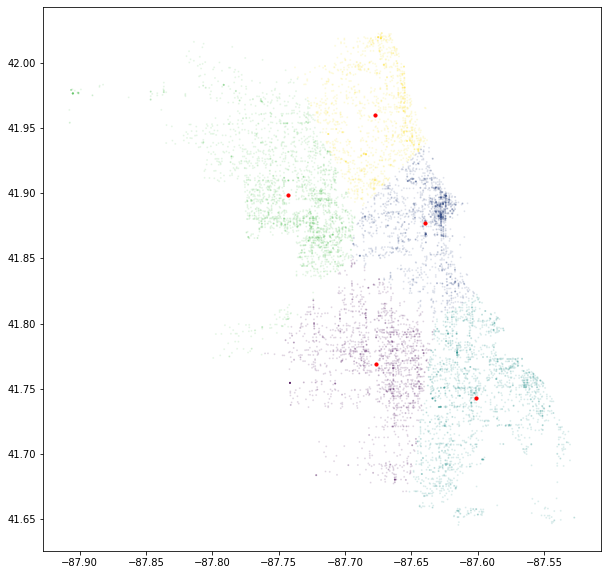

In [65]:
# it always a good idea to plot the clusters
from matplotlib import pyplot as plt
x = data['Longitude']
y = data['Latitude']
colors = cluster_labels
plt.figure(figsize=(10,10))
plt.scatter(x, y,s =1, c=colors, alpha=.1)
plt.scatter(results['Longitude'], results['Latitude'], c ='red',s =10 )


plt.show()
display()


####  Choose number of clusters with silloute method
resources:
+ https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

+ https://en.wikipedia.org/wiki/Silhouette_(clustering)
    
#### What are good Scores ?
+ Scores range between -1 and 1
+ Generally, a score should be positive, and it it's not, that sugggest the cluster boundaries may be arbitrary

+ Score close to 1 imply that points within the each cluster similar to eachother, as well as each cluster is dissimlair to it's next nearest cluster.  Clusters with low or negative values

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


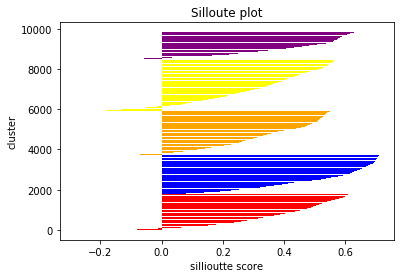

In [66]:

from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.cm import get_cmap

# between -1 and 1, higher number indicates you have good configurations, if you 

# create a scatter plot, with two of the columns of data, to see if there is any discrimination
# Establish a color for each cluster
cmap = ['red', 'blue',  'orange', 'yellow','purple']

# get the cluster number which the model assignes each row to
cluster_labels =  np.argmin(pipe.transform(data), axis=1)

# get the s score for each row of data
scores = silhouette_samples(data[lat_lon_cols], cluster_labels)

# create a array of colors, based on the labels
colors = [cmap[int(j)] for i, j in enumerate(cluster_labels)]

# get the s score the the entire data set
silhouette_score(data[lat_lon_cols], cluster_labels)

# create a bar plot to show each silloute
to_plot = pd.DataFrame({'scores':scores, 'labels':cluster_labels, 'colors': colors})
to_plot.sort_values(['labels', 'scores'], inplace=True)

plt.figure()
plt.barh(range(to_plot.shape[0]), to_plot[ 'scores'], color=to_plot['colors'])
plt.xlabel('sillioutte score')
plt.ylabel('cluster')
plt.title('Silloute plot')
plt.show()


### Decribe Nieghbors by types of crimes tha happen in them.
Objectives:
+ reshape Data
+ cluster by types of crimes
+ explore sse within and between
+ explore using silloute plots

In [67]:
# pivot the data where ward is rows, columns are primary types values are counts 
data_pivoted = pd.pivot_table(data[['Ward','Primary Type']], index='Ward', columns=['Primary Type'], aggfunc=len, fill_value=0)

In [68]:
data_pivoted.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON-CRIMINAL,OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PROSTITUTION,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Ward,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.00000,0,17,19,4,0,2,14,2,8,0,0,0,1,0,0,8,1,0,1,1,9,0,2,8,0,0,81,2
2.00000,1,30,53,11,0,1,34,11,30,0,1,0,0,0,0,9,5,0,0,2,14,0,4,11,2,0,135,5
3.00000,0,20,70,6,0,3,28,5,19,0,0,1,0,0,0,8,12,0,0,1,13,1,0,6,0,0,46,3
4.00000,0,20,35,7,0,3,26,6,20,0,0,0,1,0,0,7,1,0,0,2,12,0,2,7,0,0,69,1
5.00000,0,22,36,17,0,0,28,3,18,0,1,0,0,0,0,11,7,0,0,3,23,0,0,11,0,1,47,4


In [69]:
# scale the data 
ss = StandardScaler()
data_pivoted_scaled = ss.fit_transform(data_pivoted)
data_pivoted_scaled.shape

(50, 28)

In [70]:
# pick a low number of clusters since there are only 50 rows (wards)
n_clusters = 5

# init the model
model_wards =  KMeans(n_clusters=n_clusters)
# fit the model on the scaled data 
model_wards.fit(X=data_pivoted_scaled)
# get the cluster distances 
cluster_labels = model_wards.predict(X=data_pivoted_scaled)
cluster_labels

array([0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2, 1, 3, 0, 0, 1, 1, 0,
       0, 3, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

Text(0, 0.5, 'ROBBERY')

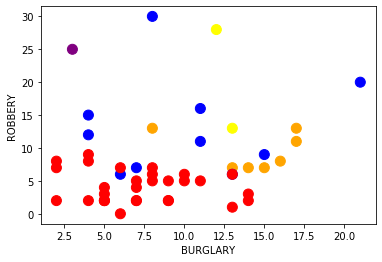

In [71]:
# create a scatter plot, with two of the columns of data, to see if there is any discrimination
# Establish a color for each cluster
cmap = ['red', 'blue',  'orange', 'yellow','purple', 'green', 'black']
# creates an array of colors for each point
colors =  [cmap[int(j)] for i, j in enumerate(cluster_labels)]
x_col = 'BURGLARY'
y_col = 'ROBBERY'
x = data_pivoted[x_col]
y = data_pivoted[y_col]
plt.figure()
plt.scatter(x, y,s =100, color=colors, alpha=1, label=colors)
plt.xlabel(x_col)
plt.ylabel(y_col)




In [72]:
# get the cluster counts
from collections import Counter
Counter(cluster_labels)


Counter({0: 30, 1: 10, 2: 7, 3: 2, 4: 1})

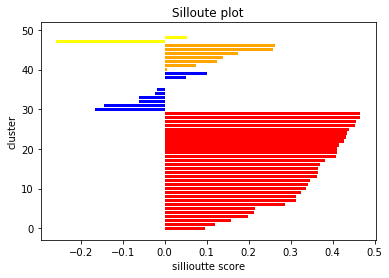

In [73]:

from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.cm import get_cmap

# between -1 and 1, higher number indicates you have good configurations, if you 


# get the s score for each row of data
scores = silhouette_samples(data_pivoted_scaled, cluster_labels)
# get the cluster number which the model assignes each row to
labels =  model_wards.predict(data_pivoted_scaled)
# create a array of colors, based on the labels
colors = [cmap[int(j)] for i, j in enumerate(labels)]

# get the s score the the entire data set
silhouette_score(data_pivoted_scaled, cluster_labels)

# create a bar plot to show each silloute
to_plot = pd.DataFrame({'scores':scores, 'labels':labels, 'colors': colors})
to_plot.sort_values(['labels', 'scores'], inplace=True)

plt.figure()
plt.barh(range(to_plot.shape[0]), to_plot[ 'scores'], color=to_plot['colors'])
plt.xlabel('sillioutte score')
plt.ylabel('cluster')
plt.title('Silloute plot')
plt.show()




## Use loops to get the best silloute scores 
since we don't know exactly how many clusters to choose, an approach is to loop through different number of cluster sizes and calcuate the silhouette scores, and find the point at which adding a cluster shows little improvement.


In [74]:
scores = []
# create a list of number of clusters to try
cluster_list = list(range(3, 10, 1))

# loop through each element of the list, building a cluster model with that elements number of centers
for i,j in enumerate(cluster_list):
    n_clusters = j
    model_temp =  KMeans(n_clusters=n_clusters)
    model_temp.fit(X=data_pivoted_scaled)
    cluster_labels = model_temp.predict(data_pivoted_scaled)
    scores.append(silhouette_score(data_pivoted_scaled, cluster_labels))
    
    


In [75]:
print(scores)
print(cluster_list)

[0.2766139937552932, 0.23688413415330953, 0.21431581012890177, 0.20856691484483247, 0.22658589823790812, 0.2580913182910398, 0.21428213707332397]
[3, 4, 5, 6, 7, 8, 9]


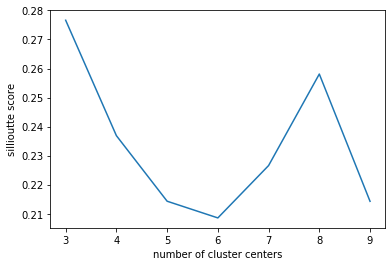

In [76]:
# create a line plot of number of
plt.figure()
plt.plot(cluster_list, scores)
plt.ylabel('sillioutte score')
plt.xlabel('number of cluster centers')
plt.show()


## Name the Centers
looking at each cluster center indivually, names for each cetner can be obtained.


In [77]:
pd.options.display.max_columns = 100
centers = pd.DataFrame(model_wards.cluster_centers_, columns = data_pivoted.columns)

print(centers)

Primary Type    ARSON  ASSAULT  BATTERY  BURGLARY  \
0            -0.11594 -0.71124 -0.68818  -0.36475   
1             0.39130  0.97386  1.09689   0.23575   
2            -0.47826  0.94728  0.47896   1.18892   
3             1.69565  2.05713  2.31614   0.79177   
4            -0.47826  0.85349  1.69144  -1.32110   

Primary Type  CONCEALED CARRY LICENSE VIOLATION  CRIM SEXUAL ASSAULT  \
0                                      -0.20412             -0.40599   
1                                      -0.20412              1.30600   
2                                       1.25391             -0.23479   
3                                      -0.20412              0.13207   
4                                      -0.20412              0.49892   

Primary Type  CRIMINAL DAMAGE  CRIMINAL TRESPASS  DECEPTIVE PRACTICE  \
0                    -0.69346           -0.38358            -0.28678   
1                     1.06039            0.22630             0.29042   
2                     0.72568   